# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [34]:
!pip install statsmodels
!pip install pmdarima

# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from statsmodels.tools.eval_measures import mse,rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Load dataset
load the dataset, don't forget to set the index column and parse the dates correctly so that pandas can understand it, also set the frequency of the data.

In [7]:
## CODE HERE
df = pd.read_csv("./data/HospitalityEmployees.csv", index_col='Date', parse_dates=True)
df

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
...,...
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3


In [2]:
## DON'T WRITE HERE

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

<AxesSubplot:title={'center':'California Hospitality Industry Employees'}, xlabel='Date'>

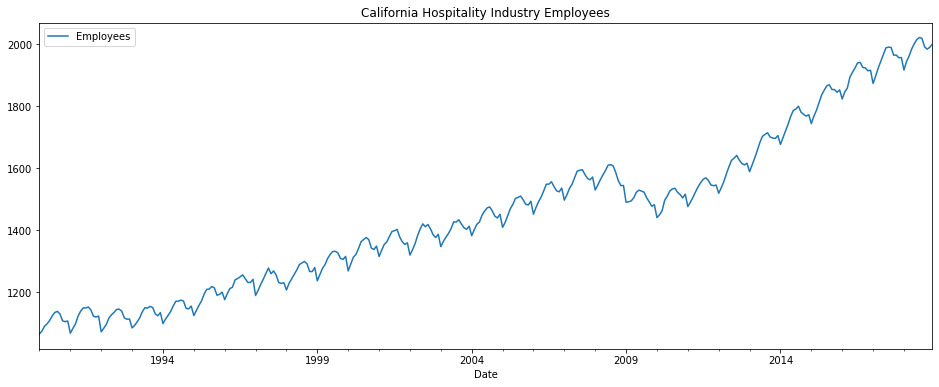

In [11]:
## CODE HERE
df.plot(figsize=(16,6),title="California Hospitality Industry Employees")





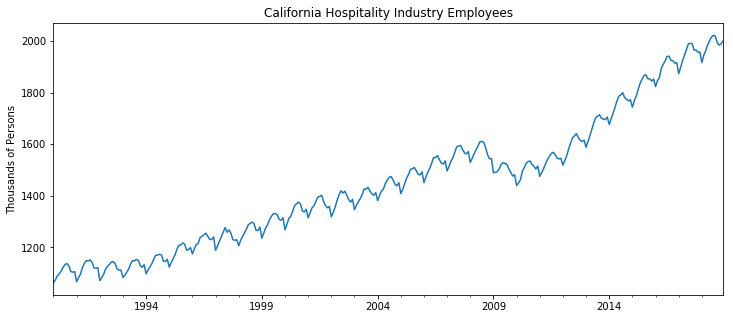

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

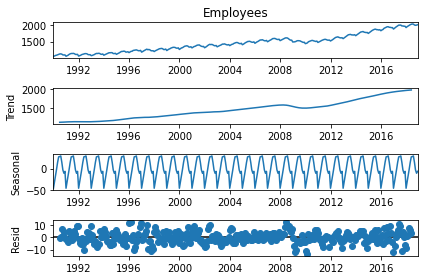

In [17]:
result = seasonal_decompose(df['Employees'], model="additive")
result.plot();

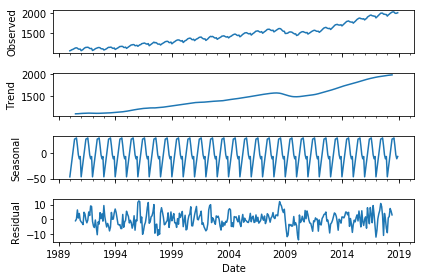

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [20]:
auto_arima(df['Employees'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Tue, 15 Mar 2022   AIC                           2208.504
Time:                                      13:30:25   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order combined with a seasonal order.
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [27]:
train = df[:(len(df)-12)]
test = df[(len(df)-12):]


In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(p,d,q)(P,D,Q,m) model to the training set

In [28]:
model = SARIMAX(train['Employees'], order=(0,1,0), seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Tue, 15 Mar 2022   AIC                           2196.814
Time:                                    13:39:10   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [30]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename("SARIMA predictions")

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

<AxesSubplot:title={'center':'California Hospitality Industry Employees'}, ylabel='Thousands pf Persons'>

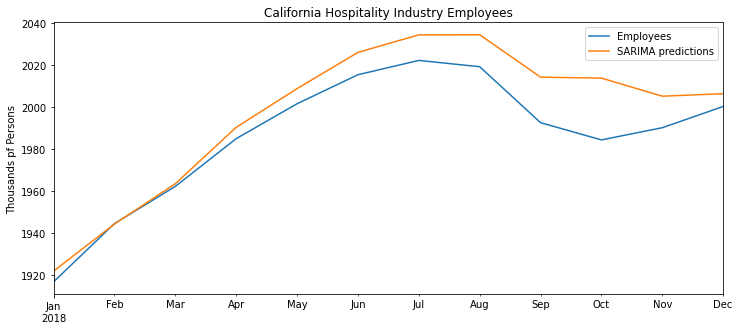

In [32]:
title = "California Hospitality Industry Employees"
ylabel = "Thousands pf Persons"
xlabel= ""
test['Employees'].plot(legend=True, figsize=(12,5), xlabel=xlabel, ylabel=ylabel, title=title)
predictions.plot(legend=True)

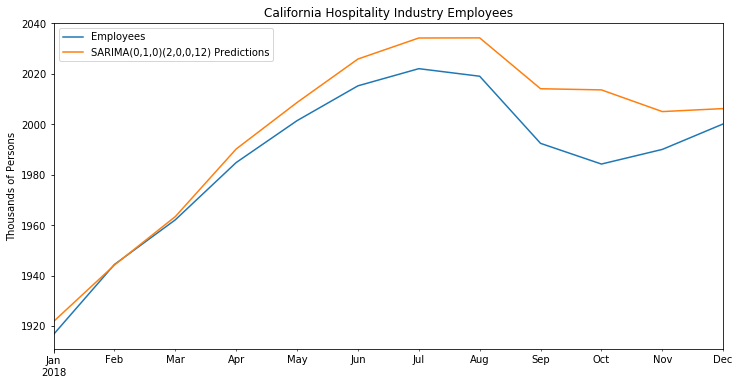

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [38]:
error1 = mse(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)

print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 182.85066351836554
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 13.522228496751767


In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [39]:
model = SARIMAX(df['Employees'], order=(0,1,0), seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.677
Date:                            Tue, 15 Mar 2022   AIC                           2275.353
Time:                                    16:34:12   BIC                           2286.901
Sample:                                01-01-1990   HQIC                          2279.951
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5293      0.040     13.352      0.000       0.452       0.607
ar.S.L24       0.4297      0.041     10.416      0.000       0.349       0.511
sigma2        37.3116      2.152     17.335      0.000      33.093      41.530
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                51.83
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

<AxesSubplot:title={'center':'California Hospitality Industry Employees'}, ylabel='Thousands pf Persons'>

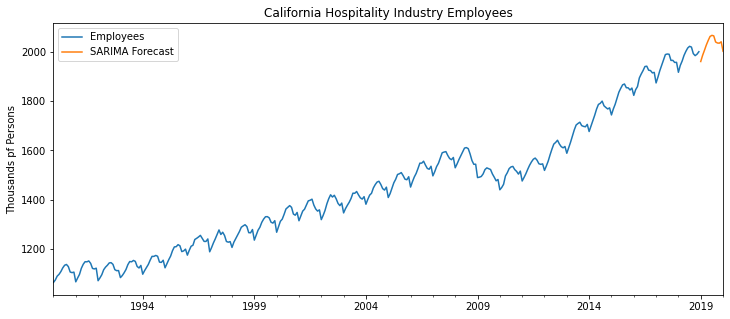

In [41]:
start = len(df)
end = len(df)+12
predictions = results.predict(start=start, end=end, dynamic=False).rename("SARIMA Forecast")

#plotting the forecast
title = "California Hospitality Industry Employees"
ylabel = "Thousands pf Persons"
xlabel= ""
df['Employees'].plot(legend=True, figsize=(12,5), xlabel=xlabel, ylabel=ylabel, title=title)
predictions.plot(legend=True)

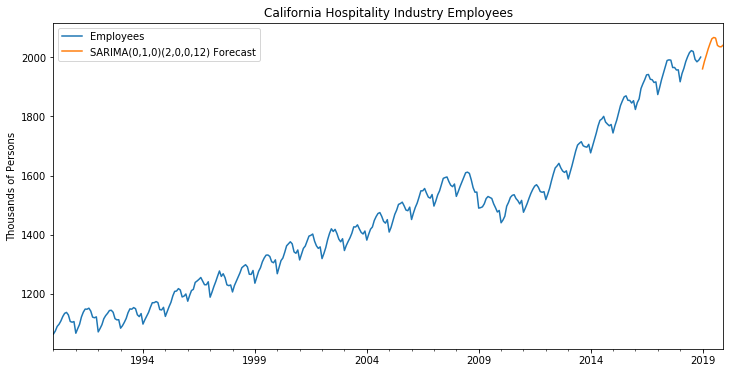

In [11]:
# DON'T WRITE HERE

## OPTIONAL QUESTION:
Observe the seasonality of the data, what do you think is the reason for the the spikes during the middle of each year and the dips during the the start of each year, also each year there's a tiny spike after each major spike, briefly reason about these patterns:

In [ ]:
###WRITE HERE

## Great job!